In [105]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

Merging all CSV in single file

In [18]:
# loading all files at once

files = [file for file in os.listdir("./Sales_Data")]

#printinf all files

for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [19]:
# concate all dataframes
adf=pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    adf=pd.concat([adf,df])


In [20]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [21]:
#saving concated file in csv format

adf.to_csv("merged_csv", index=False)

Cleaning

In [22]:
adf.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [23]:
#droping NaN

adf=adf.dropna()

In [24]:
adf.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [25]:
#findinf OR and Delete it

temp=adf[adf["Order Date"].str[0:2]=="Or"]


In [26]:
temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [27]:
#droping "Or"

adf=adf[adf["Order Date"].str[0:2]!="Or"]

Adding Few Cols

In [28]:
# adding few cols
# month col

adf["month"]=adf["Order Date"].str[0:2]

# strnig to int

adf["month"]=adf["month"].astype("int32")

In [29]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [69]:
#add sales col

adf["Sales"]=adf["Quantity Ordered"]*adf["Price Each"]

In [62]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.9511.95,DallasTX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los AngelesCA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA


In [64]:
adf.dtypes

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
month                int32
Sales               object
City                object
dtype: object

In [71]:
adf["Price Each"]=adf["Price Each"].astype("float64")

adf["Sales"]=adf["Sales"].astype("float64")

In [72]:
adf.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
Sales               float64
City                 object
dtype: object

Best month for Sales

In [73]:
adf.groupby("month").sum()

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show(close=None, block=None)>

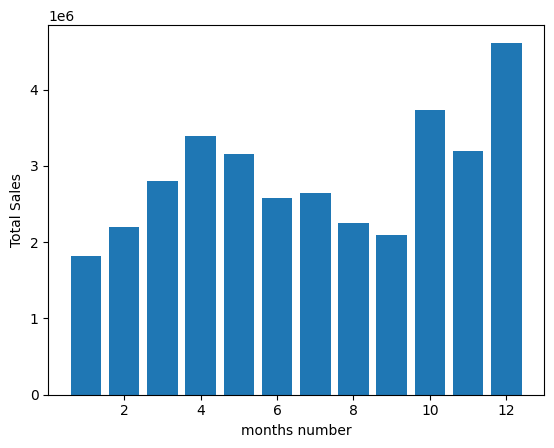

In [74]:
#ploting
result=adf.groupby("month").sum()
months=range(1,13)
plt.bar(months, result["Sales"])
plt.xlabel("months number")
plt.ylabel("Total Sales")

plt.show

City with Highest Sale

In [75]:
# Extracting city col
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

adf["City"]=adf["Purchase Address"].apply(lambda x: get_city(x)+''+ get_state(x))

In [76]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,DallasTX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,BostonMA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA


In [77]:
result=adf.groupby("City").sum()

result

,Quantity Ordered,Price Each,month,Sales
City,,,,
AtlantaGA,16602,2.779908e+06,104794,2.795499e+06
AustinTX,11153,1.809874e+06,69829,1.819582e+06
BostonMA,22528,3.637410e+06,141112,3.661642e+06
DallasTX,16730,2.752628e+06,104620,2.767975e+06
Los AngelesCA,33289,5.421435e+06,208325,5.452571e+06
New York CityNY,27932,4.635371e+06,175741,4.664317e+06
PortlandME,2750,4.471892e+05,17144,4.497583e+05
PortlandOR,11303,1.860558e+06,70621,1.870732e+06
San FranciscoCA,50239,8.211462e+06,315520,8.262204e+06


<function matplotlib.pyplot.show(close=None, block=None)>

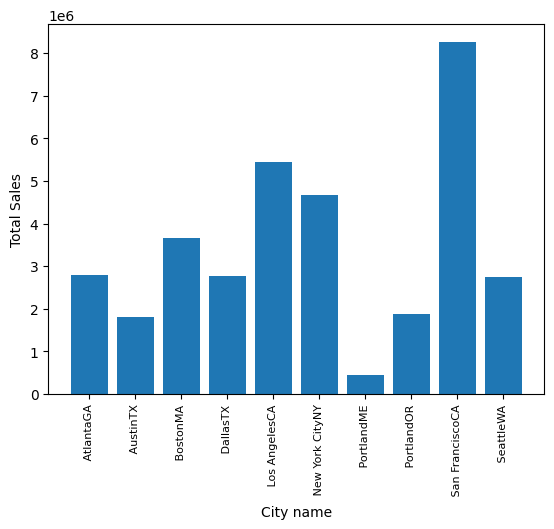

In [78]:
#ploting

City=[city for city, df in adf.groupby("City")]
plt.bar(City, result["Sales"])
plt.xlabel("City name")
plt.ylabel("Total Sales")
plt.xticks(City, rotation="vertical", size=8)
plt.show

Perfect time for Advertisements

In [79]:
adf["Order Date"]=pd.to_datetime(adf["Order Date"])

In [80]:
adf["Hour"]=adf["Order Date"].dt.hour
adf["Minute"]=adf["Order Date"].dt.minute

In [81]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,BostonMA,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,9,27


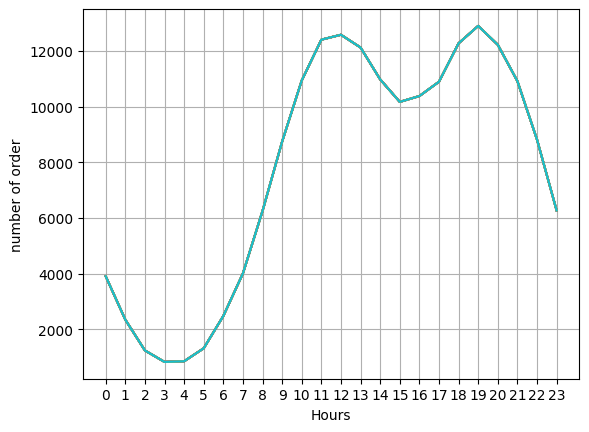

In [82]:
#ploting

hours=[Hour for Hour, df in adf.groupby("Hour")]
plt.plot(hours, adf.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("number of order")
plt.show()

products sold together

In [100]:
#checking duplicate

df= adf[adf["Order ID"].duplicated(keep=False)]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,14,38
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,19,42
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los AngelesCA,19,42
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,BostonMA,11,31


In [101]:
#new col

df["grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x) )

C:\Users\91969\AppData\Local\Temp\ipykernel_13240\3122039109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x) )


In [102]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,grouped
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los AngelesCA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,BostonMA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [103]:
#droping out same pairs ordered

df=df[["Order ID", "grouped"]].drop_duplicates()

In [104]:
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [108]:


count=Counter()
for row in df["grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))#common 2

count.most_common(10)   


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [109]:
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [110]:
#common 2 items

count=Counter()
for row in df["grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))#common 2

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

most sold product

In [111]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,BostonMA,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los AngelesCA,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los AngelesCA,9,27


In [112]:
product_group=adf.groupby("Product")

product_group.sum()

,Quantity Ordered,Price Each,month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,4.510690e+05,29336,4.541487e+05,58764,122252
27in 4K Gaming Monitor,6244,2.429638e+06,44440,2.435097e+06,90916,184331
27in FHD Monitor,7550,1.125975e+06,52558,1.132425e+06,107540,219948
34in Ultrawide Monitor,6199,2.348718e+06,43304,2.355558e+06,89076,183480
AA Batteries (4-pack),27635,7.901568e+04,145558,1.061184e+05,298342,609039
AAA Batteries (4-pack),31017,6.171659e+04,146370,9.274083e+04,297332,612113
Apple Airpods Headphones,15661,2.332350e+06,109477,2.349150e+06,223304,455570
Bose SoundSport Headphones,13457,1.332367e+06,94113,1.345565e+06,192445,392603
Flatscreen TV,4819,1.440000e+06,34224,1.445700e+06,68815,142789


In [113]:
quantity_ordered=product_group.sum()["Quantity Ordered"]

<function matplotlib.pyplot.show(close=None, block=None)>

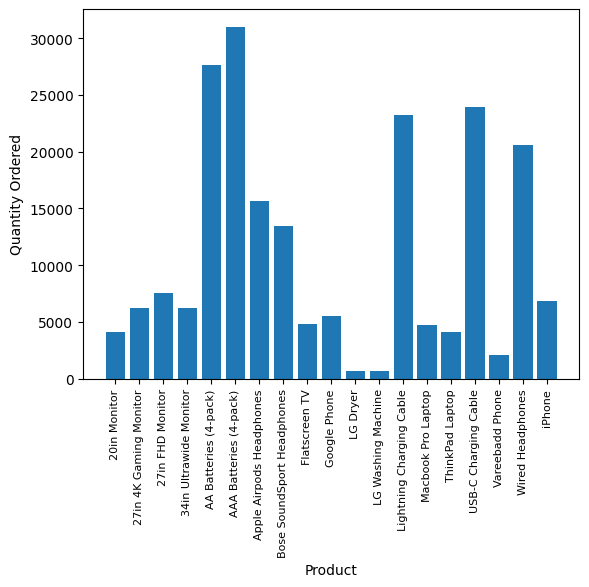

In [119]:
#ploting

products=[product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation="vertical", size=8)

plt.show


C:\Users\91969\AppData\Local\Temp\ipykernel_13240\3056983303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


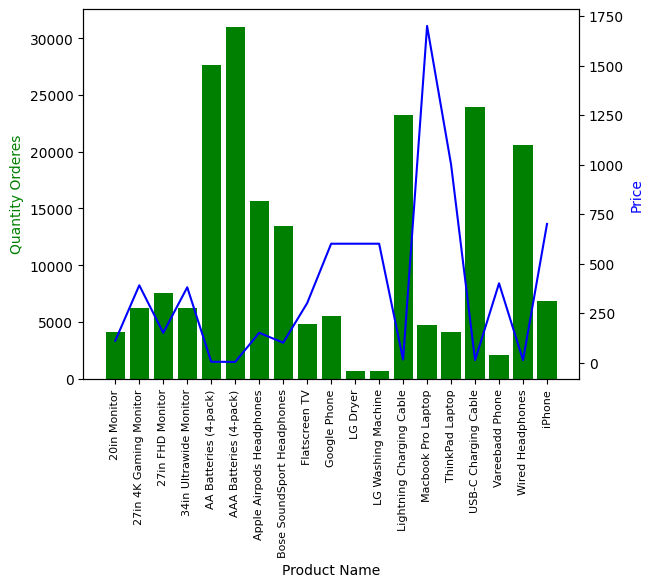

In [126]:
#ploting prices of each products
prices=adf.groupby("Product").mean()["Price Each"]

fig, ax1 =plt.subplots()

ax2=ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices,"b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Orderes", color="g")
ax2.set_ylabel("Price", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()